In [1]:
from pyspark.sql.functions import *
from pyspark.sql.functions import col, expr, lit
from pyspark.sql.types import *
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName("AirlineStatusPrep_xiomara_1").getOrCreate() 
spark.sparkContext

23/11/28 19:04:13 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


<SparkContext master=yarn appName=PySparkShell>

In [3]:
df = spark.read.parquet("gs://msca-bdp-student-gcs/Group7_Final_Project/flight_status/flight_status.parquet", 
                                     header = True, inferSchema = True)


In [4]:
df.show(1)

23/11/28 19:04:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------------------+-----------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+-----------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|D

In [5]:
df.printSchema()

root
 |-- FlightDate: timestamp (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: long (nullable = true)
 |-- Quarter: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- DOT_ID_Mar

In [6]:
df = df.drop("Operated_or_Branded_Code_Share_Partners","DOT_ID_Marketing_Airline", \
             "DOT_ID_Operating_Airline","IATA_Code_Operating_Airline", "__index_level_0__",\
            "IATA_Code_Operating_Airline", "IATA_Code_Marketing_Airline")

In [7]:
df.printSchema()

root
 |-- FlightDate: timestamp (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: long (nullable = true)
 |-- Quarter: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: s

In [8]:
df = df.withColumnRenamed('FlightDate', 'flight_date')\
        .withColumnRenamed('Airline', 'airline')\
        .withColumnRenamed('Origin', 'origin')\
        .withColumnRenamed('Dest', 'destination')\
        .withColumnRenamed('Cancelled', 'cancelled')\
        .withColumnRenamed('Diverted', 'diverted')\
        .withColumnRenamed('CRSDepTime', 'crs_departure_time')\
        .withColumnRenamed('DepTime', 'departure_time')\
        .withColumnRenamed('DepDelayMinutes', 'departure_delay_mins')\
        .withColumnRenamed('DepDelay', 'departure_delay')\
        .withColumnRenamed('ArrTime', 'arrival_time')\
        .withColumnRenamed('ArrDelayMinutes', 'arrival_delay_mins')\
        .withColumnRenamed('CRSElapsedTime', 'crs_elapsed_time')\
        .withColumnRenamed('ActualElapsedTime', 'actual_elapsed_time')\
        .withColumnRenamed('Distance', 'distance')\
        .withColumnRenamed('AirTime', 'air_time')\
        .withColumnRenamed('Quarter', 'quarter')\
        .withColumnRenamed('Year', 'year')\
        .withColumnRenamed('Month', 'month')\
        .withColumnRenamed('DayOfWeek', 'day_of_week')\
        .withColumnRenamed('DayOfMonth', 'day_of_month')\
        .withColumnRenamed('Marketing_Airline_Network', 'marketing_airline_network')\
        .withColumnRenamed('Flight_Number_Marketing_Airline', 'flight_number_marketing_airline')\
        .withColumnRenamed('Tail_Number', 'tail_number')\
        .withColumnRenamed('OriginAirportID', 'origin_airport_id')\
        .withColumnRenamed('OriginAirportSeqID', 'origin_airport_seq_id')\
        .withColumnRenamed('OriginCityMarketID', 'origin_city_market_id')\
        .withColumnRenamed('OriginCityName', 'origin_city_name')\
        .withColumnRenamed('OriginState', 'origin_state')\
        .withColumnRenamed('OriginStateFips', 'origin_state_fips')\
        .withColumnRenamed('OriginStateName', 'origin_state_name')\
        .withColumnRenamed('OriginWac', 'origin_airport_world_area_code')\
        .withColumnRenamed('DestAirportID', 'destination_airport_id')\
        .withColumnRenamed('DestAirportSeqID', 'destination_airport_seq_id')\
        .withColumnRenamed('DestCityMarketID', 'destination_city_market_id')\
        .withColumnRenamed('DestCityName', 'destination_city_name')\
        .withColumnRenamed('DestState', 'destination_state')\
        .withColumnRenamed('DestStateFips', 'destination_state_fips')\
        .withColumnRenamed('DestStateName', 'destination_state_name')\
        .withColumnRenamed('DestWac', 'destination_airport_world_area_code')\
        .withColumnRenamed('DepDel15', 'departure_delay_15')\
        .withColumnRenamed('DepartureDelayGroups', 'departure_delay_groups')\
        .withColumnRenamed('DepTimeBlk', 'departure_time_block')\
        .withColumnRenamed('TaxiOut', 'taxi_out')\
        .withColumnRenamed('WheelsOff', 'wheels_off')\
        .withColumnRenamed('WheelsOn', 'wheels_on')\
        .withColumnRenamed('TaxiIn', 'taxi_in')\
        .withColumnRenamed('CRSArrTime', 'crs_arrival_time')\
        .withColumnRenamed('ArrDelay', 'arrival_delay')\
        .withColumnRenamed('ArrDel15', 'arrival_delay_15')\
        .withColumnRenamed('ArrivalDelayGroups', 'arrival_delay_groups')\
        .withColumnRenamed('ArrTimeBlk', 'arrival_time_block')\
        .withColumnRenamed('DistanceGroup', 'distance_group')\
        .withColumnRenamed('DivAirportLandings', 'diverted_airport_landings')\
        .withColumnRenamed('Flight_Number_Operating_Airline', 'flight_mumber_operating_airline')\
        .withColumnRenamed('Operating_Airline', 'operating_airline')

In [9]:
df.printSchema()

root
 |-- flight_date: timestamp (nullable = true)
 |-- airline: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cancelled: boolean (nullable = true)
 |-- diverted: boolean (nullable = true)
 |-- crs_departure_time: long (nullable = true)
 |-- departure_time: double (nullable = true)
 |-- departure_delay_mins: double (nullable = true)
 |-- departure_delay: double (nullable = true)
 |-- arrival_time: double (nullable = true)
 |-- arrival_delay_mins: double (nullable = true)
 |-- air_time: double (nullable = true)
 |-- crs_elapsed_time: double (nullable = true)
 |-- actual_elapsed_time: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- year: long (nullable = true)
 |-- quarter: long (nullable = true)
 |-- month: long (nullable = true)
 |-- day_of_month: long (nullable = true)
 |-- day_of_week: long (nullable = true)
 |-- marketing_airline_network: string (nullable = true)
 |-- flight_number_marketing_airli

In [10]:
df = df.withColumn('departure_delay_15',when(col('departure_delay_15') == 1.0, True).otherwise(False))\
        .withColumn('arrival_delay_15',when(col('arrival_delay_15') == 1.0, True).otherwise(False))\
        .withColumn("departure_time", col("departure_time").cast("int"))\
        .withColumn("departure_time", lpad("departure_time", 4, "0"))\
        .withColumn("hour_departure_time", substring("departure_time", 1, 2))\
        .withColumn("minute_departure_time", substring("departure_time", -2, 2))\
        .withColumn("departure_time_formatted", concat_ws(":", "hour_departure_time", "minute_departure_time"))\
        .withColumn("crs_departure_time", lpad("crs_departure_time", 4, "0"))\
        .withColumn("hour_crs_departure_time", substring("crs_departure_time", 1, 2))\
        .withColumn("minute_crs_departure_time", substring("crs_departure_time", -2, 2))\
        .withColumn("crs_departure_time_formatted", concat_ws(":", "hour_crs_departure_time", "minute_crs_departure_time"))\
        .withColumn("arrival_time", col("arrival_time").cast("int"))\
        .withColumn("arrival_time", lpad("arrival_time", 4, "0"))\
        .withColumn("hour_arrival_time", substring("arrival_time", 1, 2))\
        .withColumn("minute_arrival_time", substring("arrival_time", -2, 2))\
        .withColumn("arrival_time_formatted", concat_ws(":", "hour_arrival_time", "minute_arrival_time"))\
        .withColumn("crs_arrival_time", lpad("crs_arrival_time", 4, "0"))\
        .withColumn("hour_crs_arrival_time", substring("crs_arrival_time", 1, 2))\
        .withColumn("minute_crs_arrival_time", substring("crs_arrival_time", -2, 2))\
        .withColumn("crs_arrival_time_formatted", concat_ws(":", "hour_crs_arrival_time", "minute_crs_arrival_time"))


In [11]:
df.printSchema()

root
 |-- flight_date: timestamp (nullable = true)
 |-- airline: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cancelled: boolean (nullable = true)
 |-- diverted: boolean (nullable = true)
 |-- crs_departure_time: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- departure_delay_mins: double (nullable = true)
 |-- departure_delay: double (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- arrival_delay_mins: double (nullable = true)
 |-- air_time: double (nullable = true)
 |-- crs_elapsed_time: double (nullable = true)
 |-- actual_elapsed_time: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- year: long (nullable = true)
 |-- quarter: long (nullable = true)
 |-- month: long (nullable = true)
 |-- day_of_month: long (nullable = true)
 |-- day_of_week: long (nullable = true)
 |-- marketing_airline_network: string (nullable = true)
 |-- flight_number_marketing_air

In [12]:
df.write\
.mode('overwrite')\
.option('header', 'true')\
.csv("gs://msca-bdp-student-gcs/Group7_Final_Project/flight_status/airline_status_preprocessed.csv")

In [13]:
df.createOrReplaceTempView("flight_status_unclean")
query = """
    SELECT flight_date,
            departure_time_formatted,
            crs_departure_time_formatted,
            arrival_time_formatted,
            crs_arrival_time_formatted,
            departure_delay
    FROM flight_status_unclean
    WHERE HOUR(departure_time_formatted) < 7 
"""
result_df = spark.sql(query)

result_df.show()



+-------------------+------------------------+----------------------------+----------------------+--------------------------+---------------+
|        flight_date|departure_time_formatted|crs_departure_time_formatted|arrival_time_formatted|crs_arrival_time_formatted|departure_delay|
+-------------------+------------------------+----------------------------+----------------------+--------------------------+---------------+
|2018-01-03 00:00:00|                   06:15|                       06:15|                 06:50|                     07:11|           null|
|2018-01-04 00:00:00|                   06:11|                       06:15|                 07:00|                     07:11|           -4.0|
|2018-01-05 00:00:00|                   06:03|                       06:15|                 06:54|                     07:11|          -12.0|
|2018-01-06 00:00:00|                   06:10|                       06:15|                 06:55|                     07:10|           -5.0|
|2018-

#### Finding empty rows and dropping empty rows
- We ultimately can't drop rows where they have columns that are null because 654,075 are nulls due to flights that were cancelled so if we were to drop, we'll lose key data about cancellations

In [14]:
df_clean = df.dropna()

num_rows_before = df.count()
num_rows_after = df_clean.count()
diff = num_rows_before - num_rows_after

print(f"Number of rows before dropping empty rows: {num_rows_before}")
print(f"Number of rows after dropping empty rows: {num_rows_after}")

if num_rows_before != num_rows_after:
    print(f"There were {diff} empty rows in the DataFrame.")
else:
    print("No empty rows in the DataFrame.")

Number of rows before dropping empty rows: 25115464
Number of rows after dropping empty rows: 24394594
There were 720870 empty rows in the DataFrame.


In [15]:
condition_column = 'cancelled'

row_count_before = df.count()

filtered_df = df.na.drop(subset=["airline", "day_of_week", \
                        "taxi_out", "crs_elapsed_time", "distance", "arrival_delay", "departure_delay"])

row_count_after = filtered_df.count()

print(f"Row count before dropping: {row_count_before}")
print(f"Row count after dropping: {row_count_after}")

Row count before dropping: 25115464
Row count after dropping: 24394687


In [16]:
df.createOrReplaceTempView("flight_status")
query = """
    SELECT COUNT_IF(cancelled IS TRUE)
    FROM flight_status;
"""

result_df = spark.sql(query)

result_df.show()

+------------------------------+
|count_if((cancelled <=> true))|
+------------------------------+
|                        654075|
+------------------------------+



In [17]:
for column_name in df.columns:
    print(f"{column_name}_count > 0 OR")

flight_date_count > 0 OR
airline_count > 0 OR
origin_count > 0 OR
destination_count > 0 OR
cancelled_count > 0 OR
diverted_count > 0 OR
crs_departure_time_count > 0 OR
departure_time_count > 0 OR
departure_delay_mins_count > 0 OR
departure_delay_count > 0 OR
arrival_time_count > 0 OR
arrival_delay_mins_count > 0 OR
air_time_count > 0 OR
crs_elapsed_time_count > 0 OR
actual_elapsed_time_count > 0 OR
distance_count > 0 OR
year_count > 0 OR
quarter_count > 0 OR
month_count > 0 OR
day_of_month_count > 0 OR
day_of_week_count > 0 OR
marketing_airline_network_count > 0 OR
flight_number_marketing_airline_count > 0 OR
operating_airline_count > 0 OR
tail_number_count > 0 OR
flight_mumber_operating_airline_count > 0 OR
origin_airport_id_count > 0 OR
origin_airport_seq_id_count > 0 OR
origin_city_market_id_count > 0 OR
origin_city_name_count > 0 OR
origin_state_count > 0 OR
origin_state_fips_count > 0 OR
origin_state_name_count > 0 OR
origin_airport_world_area_code_count > 0 OR
destination_airport

In [18]:
query = """
    SELECT COUNT_IF(flight_date IS NULL) AS flight_date_count,
            COUNT_IF(airline IS NULL) AS airline_count,
            COUNT_IF(origin IS NULL) AS origin_count,
            COUNT_IF(destination IS NULL) AS destination_count,
            COUNT_IF(diverted IS NULL) AS diverted_count,
            COUNT_IF(crs_departure_time IS NULL) AS crs_departure_time_count,
            COUNT_IF(departure_time IS NULL) AS departure_time_count,
            COUNT_IF(departure_delay_mins IS NULL) AS departure_delay_mins_count,
            COUNT_IF(departure_delay IS NULL) AS departure_delay_count,
            COUNT_IF(arrival_time IS NULL) AS arrival_time_count,
            COUNT_IF(arrival_delay_mins IS NULL) AS arrival_delay_mins_count,
            COUNT_IF(air_time IS NULL) AS air_time_count,
            COUNT_IF(crs_elapsed_time IS NULL) AS crs_elapsed_time_count,
            COUNT_IF(actual_elapsed_time IS NULL) AS actual_elapsed_time_count,
            COUNT_IF(distance IS NULL) AS distance_count,
            COUNT_IF(year IS NULL) AS year_count,
            COUNT_IF(quarter IS NULL) AS quarter_count,
            COUNT_IF(month IS NULL) AS month_count,
            COUNT_IF(day_of_month IS NULL) AS day_of_month_count,
            COUNT_IF(day_of_week IS NULL) AS day_of_week_count,
            COUNT_IF(marketing_airline_network IS NULL) AS marketing_airline_network_count,
            COUNT_IF(flight_number_marketing_airline IS NULL) AS flight_number_marketing_airline_count,
            COUNT_IF(operating_airline IS NULL) AS operating_airline_count,
            COUNT_IF(tail_number IS NULL) AS tail_number_count,
            COUNT_IF(flight_mumber_operating_airline IS NULL) AS flight_mumber_operating_airline_count,
            COUNT_IF(origin_airport_id IS NULL) AS origin_airport_id_count,
            COUNT_IF(origin_airport_seq_id IS NULL) AS origin_airport_seq_id_count,
            COUNT_IF(origin_city_market_id IS NULL) AS origin_city_market_id_count,
            COUNT_IF(origin_city_name IS NULL) AS origin_city_name_count,
            COUNT_IF(origin_state IS NULL) AS origin_state_count,
            COUNT_IF(origin_state_fips IS NULL) AS origin_state_fips_count,
            COUNT_IF(origin_state_name IS NULL) AS origin_state_name_count,
            COUNT_IF(origin_airport_world_area_code IS NULL) AS origin_airport_world_area_code_count,
            COUNT_IF(destination_airport_id IS NULL) AS destination_airport_id_count,
            COUNT_IF(destination_airport_seq_id IS NULL) AS destination_airport_seq_id_count,
            COUNT_IF(destination_city_market_id IS NULL) AS destination_city_market_id_count,
            COUNT_IF(destination_city_name IS NULL) AS destination_city_name_count,
            COUNT_IF(destination_state IS NULL) AS destination_state_count,
            COUNT_IF(destination_state_fips IS NULL) AS destination_state_fips_count,
            COUNT_IF(destination_state_name IS NULL) AS destination_state_name_count,
            COUNT_IF(destination_airport_world_area_code IS NULL) AS destination_airport_world_area_code_count,
            COUNT_IF(departure_delay_15 IS NULL) AS departure_delay_15_count,
            COUNT_IF(departure_delay_groups IS NULL) AS departure_delay_groups_count,
            COUNT_IF(departure_time_block IS NULL) AS departure_time_block_count,
            COUNT_IF(taxi_out IS NULL) AS taxi_out_count,
            COUNT_IF(wheels_off IS NULL) AS wheels_off_count,
            COUNT_IF(wheels_on IS NULL) AS wheels_on_count,
            COUNT_IF(taxi_in IS NULL) AS taxi_in_count,
            COUNT_IF(crs_arrival_time IS NULL) AS crs_arrival_time_count,
            COUNT_IF(arrival_delay IS NULL) AS arrival_delay_count,
            COUNT_IF(arrival_delay_15 IS NULL) AS arrival_delay_15_count,
            COUNT_IF(arrival_delay_groups IS NULL) AS arrival_delay_groups_count,
            COUNT_IF(arrival_time_block IS NULL) AS arrival_time_block_count,
            COUNT_IF(distance_group IS NULL) AS distance_group_count,
            COUNT_IF(diverted_airport_landings IS NULL) AS diverted_airport_landings_count
    FROM flight_status
    WHERE cancelled IS FALSE;
"""

result_df = spark.sql(query)

result_df.show()

+-----------------+-------------+------------+-----------------+--------------+------------------------+--------------------+--------------------------+---------------------+------------------+------------------------+--------------+----------------------+-------------------------+--------------+----------+-------------+-----------+------------------+-----------------+-------------------------------+-------------------------------------+-----------------------+-----------------+-------------------------------------+-----------------------+---------------------------+---------------------------+----------------------+------------------+-----------------------+-----------------------+------------------------------------+----------------------------+--------------------------------+--------------------------------+---------------------------+-----------------------+----------------------------+----------------------------+-----------------------------------------+------------------------+

In [19]:
nulls_in_column = df.filter(col('flight_date').isNull())
nulls_in_column.show()

+-----------+-------+------+-----------+---------+--------+------------------+--------------+--------------------+---------------+------------+------------------+--------+----------------+-------------------+--------+----+-------+-----+------------+-----------+-------------------------+-------------------------------+-----------------+-----------+-------------------------------+-----------------+---------------------+---------------------+----------------+------------+-----------------+-----------------+------------------------------+----------------------+--------------------------+--------------------------+---------------------+-----------------+----------------------+----------------------+-----------------------------------+------------------+----------------------+--------------------+--------+----------+---------+-------+----------------+-------------+----------------+--------------------+------------------+--------------+-------------------------+-------------------+-----------

In [20]:
nulls_in_column = df.filter(col('flight_mumber_operating_airline').isNull())
nulls_in_column.show()

+-----------+-------+------+-----------+---------+--------+------------------+--------------+--------------------+---------------+------------+------------------+--------+----------------+-------------------+--------+----+-------+-----+------------+-----------+-------------------------+-------------------------------+-----------------+-----------+-------------------------------+-----------------+---------------------+---------------------+----------------+------------+-----------------+-----------------+------------------------------+----------------------+--------------------------+--------------------------+---------------------+-----------------+----------------------+----------------------+-----------------------------------+------------------+----------------------+--------------------+--------+----------+---------+-------+----------------+-------------+----------------+--------------------+------------------+--------------+-------------------------+-------------------+-----------

In [21]:
distinct_values_df = df.select('cancelled').distinct()
distinct_values_df.show()

+---------+
|cancelled|
+---------+
|     true|
|    false|
+---------+



General Overview:
- How many records are there in the dataset?
- What is the time range covered by the dataset (min and max flight_date)?
- What airlines are present in the dataset?
- What are the unique origin and destination airports?

In [22]:
df.count()

25115464

In [23]:
df.groupBy("flight_date").count().orderBy('count', ascending = False).toPandas()

,flight_date,count
0,2019-12-01,24739
1,2019-08-02,24416
2,2019-08-05,24388
3,2019-08-01,24378
4,2019-07-26,24368
...,...,...
1456,2020-05-16,5371
1457,2020-05-09,5347
1458,2020-05-05,5288
1459,2020-05-19,5251


In [24]:
df.groupBy('airline').count().orderBy('count', ascending = False).toPandas()

,airline,count
0,Southwest Airlines Co.,4742414
1,Delta Air Lines Inc.,2782803
2,SkyWest Airlines Inc.,2718876
3,American Airlines Inc.,2638164
4,United Air Lines Inc.,2002529
5,Republic Airlines,1085823
6,JetBlue Airways,949286
7,Envoy Air,922020
8,Endeavor Air Inc.,855600
9,Comair Inc.,821336


In [25]:
df.groupBy('origin').count().orderBy('count', ascending = False).toPandas()

,origin,count
0,ORD,1203018
1,ATL,1188099
2,DEN,1012493
3,DFW,943048
4,CLT,781753
...,...,...
383,ROP,151
384,TBN,142
385,ILG,118
386,BIH,39


In [26]:
df.groupBy('destination').count().orderBy('count', ascending = False).toPandas()

,destination,count
0,ORD,1202821
1,ATL,1188118
2,DEN,1012502
3,DFW,942967
4,CLT,781670
...,...,...
383,ROP,151
384,TBN,142
385,ILG,118
386,BIH,39


In [27]:
df.groupBy('origin').count().orderBy('count', ascending = False).toPandas()

,origin,count
0,ORD,1203018
1,ATL,1188099
2,DEN,1012493
3,DFW,943048
4,CLT,781753
...,...,...
383,ROP,151
384,TBN,142
385,ILG,118
386,BIH,39


In [28]:
df.groupBy('year').count().orderBy('count', ascending = False).toPandas()

,year,count
0,2019,8091684
1,2021,6311871
2,2018,5689512
3,2020,5022397


In [29]:
from pyspark.sql import functions as F

min_max_dates = filtered_df.agg(F.min("flight_date").alias("min_date"), F.max("flight_date").alias("max_date")).collect()

min_date = min_max_dates[0]["min_date"]
max_date = min_max_dates[0]["max_date"]

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2018-01-01 00:00:00
Maximum Date: 2021-12-31 00:00:00


In [30]:
df.groupBy('month').count().orderBy('count', ascending = False).toPandas()

,month,count
0,10,2332945
1,12,2307306
2,11,2260337
3,8,2231032
4,9,2211536
5,3,2203753
6,1,2136277
7,7,2071467
8,4,1956416
9,2,1824344


In [31]:
df.groupBy('origin_city_name').count().orderBy('count', ascending = False).toPandas()

,origin_city_name,count
0,"Chicago, IL",1497077
1,"Atlanta, GA",1188099
2,"Denver, CO",1012493
3,"Dallas/Fort Worth, TX",943048
4,"Houston, TX",809252
...,...,...
376,"Rota, TT",151
377,"Fort Leonard Wood, MO",142
378,"Wilmington, DE",118
379,"Bishop, CA",39


In [32]:
df.groupBy('destination_city_name').count().orderBy('count', ascending = False).toPandas()

,destination_city_name,count
0,"Chicago, IL",1496857
1,"Atlanta, GA",1188118
2,"Denver, CO",1012502
3,"Dallas/Fort Worth, TX",942967
4,"Houston, TX",809099
...,...,...
376,"Rota, TT",151
377,"Fort Leonard Wood, MO",142
378,"Wilmington, DE",118
379,"Bishop, CA",39


Cancellations and Diversions:
- How many flights are cancelled or diverted?
- What are the reasons for cancellations or diversions (if available)?
- Are cancellations or diversions more common for specific airlines or routes?

In [33]:
df.groupBy('cancelled').count().orderBy('count', ascending = False).toPandas()

,cancelled,count
0,False,24461389
1,True,654075


In [34]:
df.groupBy('cancelled', 'airline').count().orderBy('count', ascending = False).toPandas()

,cancelled,airline,count
0,False,Southwest Airlines Co.,4589170
1,False,Delta Air Lines Inc.,2746410
2,False,SkyWest Airlines Inc.,2655576
3,False,American Airlines Inc.,2561842
4,False,United Air Lines Inc.,1963542
5,False,Republic Airlines,1056329
6,False,JetBlue Airways,927822
7,False,Envoy Air,889788
8,False,Endeavor Air Inc.,841226
9,False,Comair Inc.,794892


In [35]:
df.groupBy('diverted').count().orderBy('count', ascending = False).toPandas()

,diverted,count
0,False,25057325
1,True,58139


In [36]:
df.groupBy('diverted', 'airline').count().orderBy('count', ascending = False).toPandas()

,diverted,airline,count
0,False,Southwest Airlines Co.,4733589
1,False,Delta Air Lines Inc.,2777824
2,False,SkyWest Airlines Inc.,2710287
3,False,American Airlines Inc.,2631726
4,False,United Air Lines Inc.,1997426
5,False,Republic Airlines,1083482
6,False,JetBlue Airways,946397
7,False,Envoy Air,919715
8,False,Endeavor Air Inc.,854151
9,False,Comair Inc.,819256


In [37]:
df.groupBy('departure_delay_15').count().orderBy('count', ascending = False).toPandas()

,departure_delay_15,count
0,False,21068204
1,True,4047260


In [38]:
df.groupBy('arrival_delay_15').count().orderBy('count', ascending = False).toPandas()

,arrival_delay_15,count
0,False,20962653
1,True,4152811


In [39]:
filtered_df.createOrReplaceTempView("flight_status_filtered")
query = """
WITH base AS (
    SELECT 
        origin,
        COUNT_IF(departure_delay > 0) AS total_delayed,
        COUNT_IF(departure_delay <= 0) AS total_ontime
    FROM flight_status_filtered
    GROUP BY 1
)
SELECT
    origin,
    total_delayed,
    total_ontime,
    total_delayed + total_ontime AS total_flights,
    ROUND((total_delayed/ (total_delayed + total_ontime) *100.00),2) AS flight_dep_delay_perc,
    ROUND((total_ontime/ (total_delayed + total_ontime) *100.00), 2 ) AS flight_dep_on_time_perc
FROM
    base   
ORDER BY 4 DESC;
"""

result_df = spark.sql(query)

top_7_dep_delays = result_df.limit(7)

top_7_dep_delays.show()

+------+-------------+------------+-------------+---------------------+-----------------------+
|origin|total_delayed|total_ontime|total_flights|flight_dep_delay_perc|flight_dep_on_time_perc|
+------+-------------+------------+-------------+---------------------+-----------------------+
|   ATL|       359165|      808004|      1167169|                30.77|                  69.23|
|   ORD|       360600|      800631|      1161231|                31.05|                  68.95|
|   DEN|       378037|      606526|       984563|                 38.4|                   61.6|
|   DFW|       319942|      589773|       909715|                35.17|                  64.83|
|   CLT|       226209|      532691|       758900|                29.81|                  70.19|
|   LAX|       241839|      481914|       723753|                33.41|                  66.59|
|   SEA|       196356|      418450|       614806|                31.94|                  68.06|
+------+-------------+------------+-----

In [40]:
query = """
WITH base AS (
    SELECT 
        destination,
        COUNT_IF(arrival_delay > 0) AS total_delayed,
        COUNT_IF(arrival_delay <= 0) AS total_ontime
    FROM flight_status_filtered
    GROUP BY 1
)
SELECT
    destination,
    total_delayed,
    total_ontime,
    total_delayed + total_ontime AS total_flights,
    ROUND((total_delayed/ (total_delayed + total_ontime) *100.00),2) AS flight_arr_delay_perc,
    ROUND((total_ontime/ (total_delayed + total_ontime) *100.00), 2 ) AS flight_arr_on_time_perc
FROM
    base   
ORDER BY 4 DESC;
"""

result_df = spark.sql(query)

top_7_arr_delays = result_df.limit(7)

top_7_arr_delays.show()

+-----------+-------------+------------+-------------+---------------------+-----------------------+
|destination|total_delayed|total_ontime|total_flights|flight_arr_delay_perc|flight_arr_on_time_perc|
+-----------+-------------+------------+-------------+---------------------+-----------------------+
|        ATL|       297014|      870561|      1167575|                25.44|                  74.56|
|        ORD|       368972|      790634|      1159606|                31.82|                  68.18|
|        DEN|       319200|      664022|       983222|                32.46|                  67.54|
|        DFW|       320589|      586620|       907209|                35.34|                  64.66|
|        CLT|       214754|      542919|       757673|                28.34|                  71.66|
|        LAX|       231883|      492439|       724322|                32.01|                  67.99|
|        SEA|       209601|      404715|       614316|                34.12|               

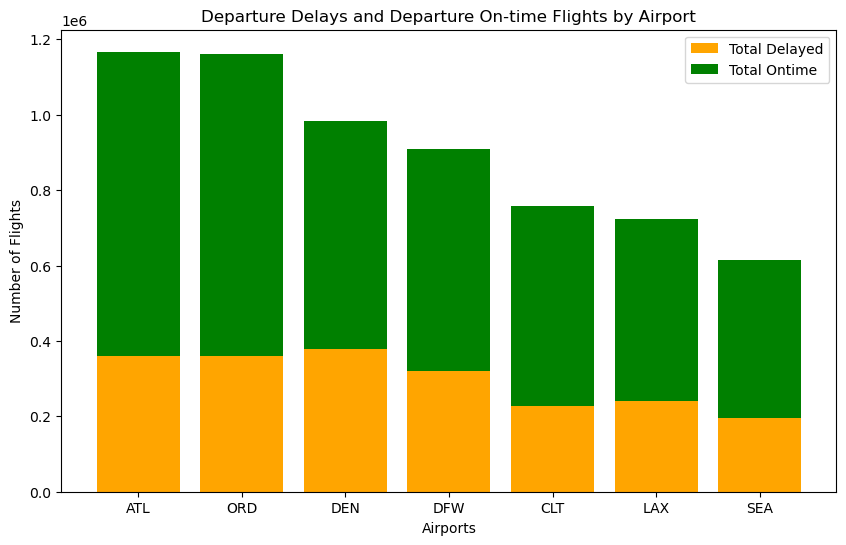

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

pandas_df = top_7_dep_delays.toPandas()

bar_positions = np.arange(len(pandas_df['origin']))

plt.bar(bar_positions, pandas_df['total_delayed'], label='Total Delayed', color='orange')
plt.bar(bar_positions, pandas_df['total_ontime'], bottom=pandas_df['total_delayed'], label='Total Ontime', color='green')

plt.xlabel('Airports')
plt.ylabel('Number of Flights')
plt.title('Departure Delays and Departure On-time Flights by Airport')
plt.xticks(bar_positions, pandas_df['origin'])

plt.legend()

plt.show()

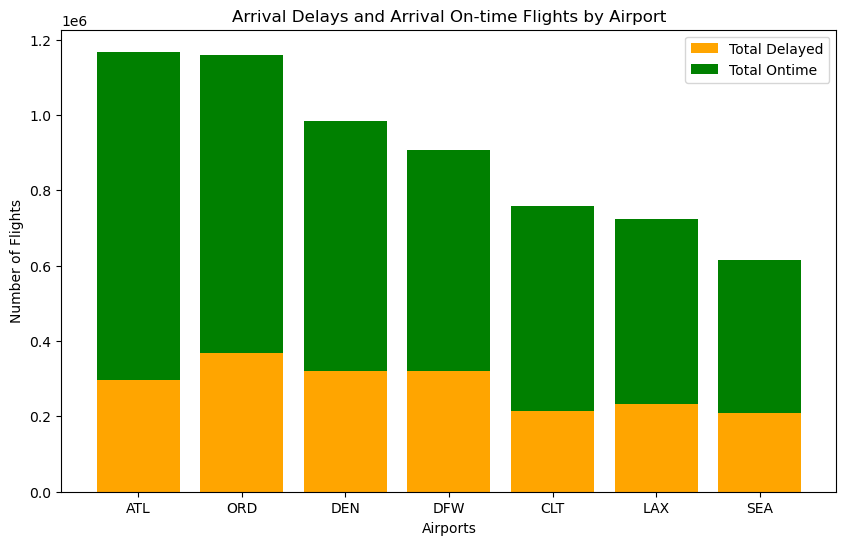

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

pandas_df = top_7_arr_delays.toPandas()

bar_positions = np.arange(len(pandas_df['destination']))

plt.bar(bar_positions, pandas_df['total_delayed'], label='Total Delayed', color='orange')
plt.bar(bar_positions, pandas_df['total_ontime'], bottom=pandas_df['total_delayed'], label='Total Ontime', color='green')

plt.xlabel('Airports')
plt.ylabel('Number of Flights')
plt.title('Arrival Delays and Arrival On-time Flights by Airport')
plt.xticks(bar_positions, pandas_df['destination'])

plt.legend()

plt.show()

#### How are departure and arrival delays distributed?

In [43]:
departure_delay_summary = df.agg(
    mean(col("departure_delay")).alias("Mean_Departure_Delay"),
    stddev(col("departure_delay")).alias("StdDev_Departure_Delay"),
    count(col("departure_delay")).alias("Count_Departure_Delay"),
    min(col("departure_delay")).alias("Min_Departure_Delay"),
    max(col("departure_delay")).alias("Max_Departure_Delay")
)
arrival_delay_summary = df.agg(
    mean(col("arrival_delay")).alias("Mean_Arrival_Delay"),
    stddev(col("arrival_delay")).alias("StdDev_Arrival_Delay"),
    count(col("arrival_delay")).alias("Count_Arrival_Delay"),
    min(col("arrival_delay")).alias("Min_Arrival_Delay"),
    max(col("arrival_delay")).alias("Max_Arrival_Delay")
)
departure_delay_summary.show()
arrival_delay_summary.show()

+--------------------+----------------------+---------------------+-------------------+-------------------+
|Mean_Departure_Delay|StdDev_Departure_Delay|Count_Departure_Delay|Min_Departure_Delay|Max_Departure_Delay|
+--------------------+----------------------+---------------------+-------------------+-------------------+
|   8.694968572347957|     46.20011962741457|             24472875|            -1280.0|             3890.0|
+--------------------+----------------------+---------------------+-------------------+-------------------+

+------------------+--------------------+-------------------+-----------------+-----------------+
|Mean_Arrival_Delay|StdDev_Arrival_Delay|Count_Arrival_Delay|Min_Arrival_Delay|Max_Arrival_Delay|
+------------------+--------------------+-------------------+-----------------+-----------------+
| 2.975809463246316|  48.215381333847866|           24402683|          -1290.0|           3864.0|
+------------------+--------------------+-------------------+------

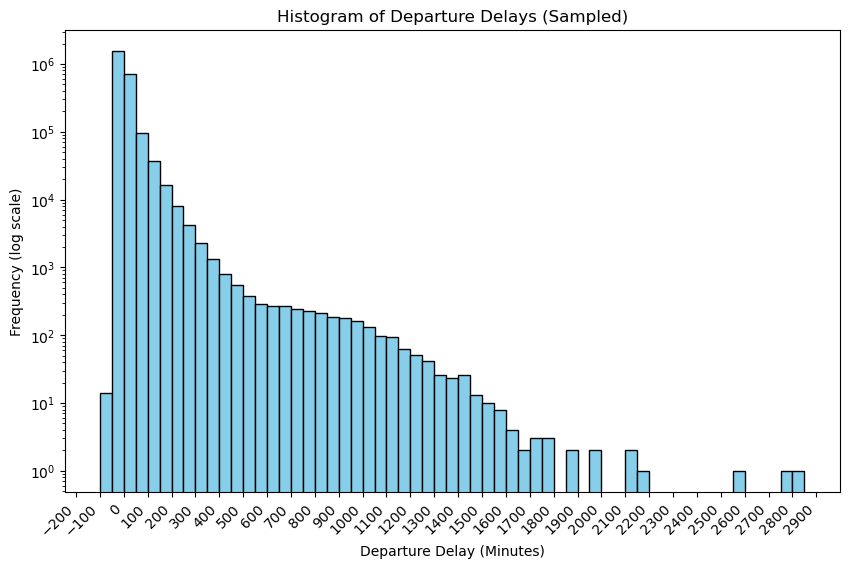

In [44]:
from matplotlib.ticker import MultipleLocator

column_data = filtered_df.select("departure_delay").rdd.flatMap(lambda x: x).sample(False, 0.1).collect()

bin_edges = np.arange(-100, 2900, 50)

fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(column_data, bins=bin_edges, color='skyblue', edgecolor='black', log=True)
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Departure Delays (Sampled)")

plt.xticks(rotation=45, ha="right")
plt.gca().xaxis.set_major_locator(MultipleLocator(100))  
plt.show()

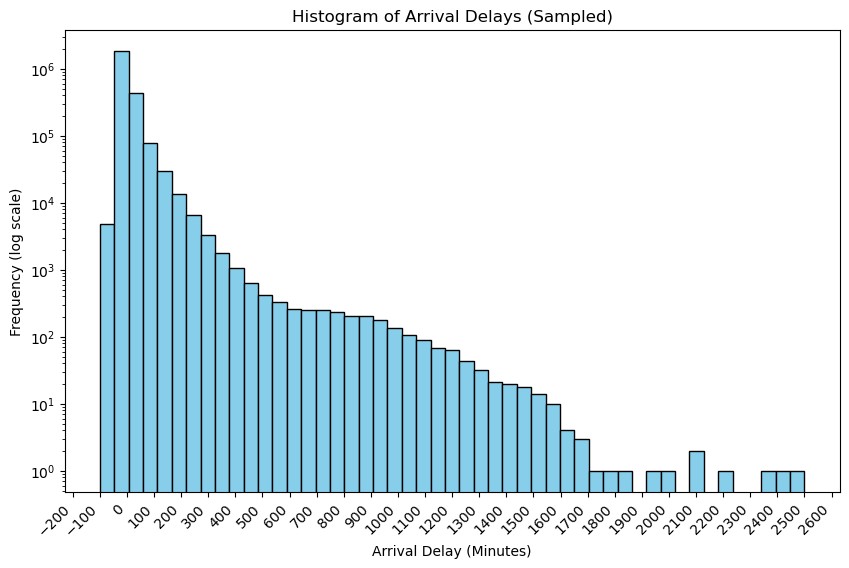

In [45]:
column_data = filtered_df.select("arrival_delay").rdd.flatMap(lambda x: x).sample(False, 0.1).collect()

bin_edges = np.linspace(-100.0, 2500.0, 50)

fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(column_data, bins=bin_edges, color='skyblue', edgecolor='black', log=True)

plt.xticks(rotation=45, ha="right")
plt.gca().xaxis.set_major_locator(MultipleLocator(100))  

plt.xlabel("Arrival Delay (Minutes)")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Arrival Delays (Sampled)")
plt.show()


Operational Metrics:
- What is the average air time for flights?
- How does taxi-out and taxi-in time vary across different airports?
- What is the distribution of elapsed time (actual and scheduled)? -->maybe not this


In [46]:
air_time_summary = df.agg(
    mean(col("air_time")).alias("Mean_air_time"),
    stddev(col("air_time")).alias("StdDev_air_time"),
    count(col("air_time")).alias("Count_air_time"),
    min(col("air_time")).alias("Min_air_time"),
    max(col("air_time")).alias("Max_air_time")
)

air_time_summary.show()

+-----------------+-----------------+--------------+------------+------------+
|    Mean_air_time|  StdDev_air_time|Count_air_time|Min_air_time|Max_air_time|
+-----------------+-----------------+--------------+------------+------------+
|108.7770288984336|68.91572246563364|      24396305|     -1244.0|      1557.0|
+-----------------+-----------------+--------------+------------+------------+



In [47]:
query = """
        SELECT flight_date,
                airline,
                departure_time_formatted,
                crs_departure_time_formatted,
                arrival_time_formatted,
                crs_arrival_time_formatted,
                departure_delay,
                air_time
        FROM flight_status
        WHERE air_time < 0;
"""

result_df = spark.sql(query)

result_df.show()

+-------------------+----------------+------------------------+----------------------------+----------------------+--------------------------+---------------+--------+
|        flight_date|         airline|departure_time_formatted|crs_departure_time_formatted|arrival_time_formatted|crs_arrival_time_formatted|departure_delay|air_time|
+-------------------+----------------+------------------------+----------------------------+----------------------+--------------------------+---------------+--------+
|2018-01-16 00:00:00|Compass Airlines|                   01:20|                       22:40|                 02:12|                     23:42|        -1280.0| -1244.0|
+-------------------+----------------+------------------------+----------------------------+----------------------+--------------------------+---------------+--------+



In [48]:
df.groupBy( 'origin', 'taxi_out',).count().orderBy('count', ascending = False).toPandas()

,origin,taxi_out,count
0,ATL,12.0,114512
1,ATL,13.0,114209
2,ATL,14.0,105296
3,ATL,11.0,104913
4,ATL,15.0,93310
...,...,...,...
33711,MYR,125.0,1
33712,MVY,47.0,1
33713,BFF,51.0,1
33714,DAB,79.0,1


In [49]:
df.groupBy( 'origin', 'taxi_in',).count().orderBy('count', ascending = False).toPandas()

,origin,taxi_in,count
0,ATL,4.0,253001
1,ORD,4.0,230794
2,ATL,3.0,207202
3,ORD,5.0,203772
4,DEN,4.0,194967
...,...,...,...
26755,PVU,60.0,1
26756,SHR,33.0,1
26757,DAY,137.0,1
26758,ELM,97.0,1


In [50]:
crs_elapsed_time_summary = df.agg(
    mean(col("crs_elapsed_time")).alias("Mean_crs_elapsed_time"),
    stddev(col("crs_elapsed_time")).alias("StdDev_crs_elapsed_time"),
    count(col("crs_elapsed_time")).alias("Count_crs_elapsed_time"),
    min(col("crs_elapsed_time")).alias("Min_crs_elapsed_time"),
    max(col("crs_elapsed_time")).alias("Max_crs_elapsed_time")
)
actual_elapsed_time_summary = df.agg(
    mean(col("actual_elapsed_time")).alias("Mean_actual_elapsed_time"),
    stddev(col("actual_elapsed_time")).alias("StdDev_actual_elapsed_time"),
    count(col("actual_elapsed_time")).alias("Count_actual_elapsed_time"),
    min(col("actual_elapsed_time")).alias("Min_actual_elapsed_time"),
    max(col("actual_elapsed_time")).alias("Max_actual_elapsed_time")
)

actual_elapsed_time_summary.show()
crs_elapsed_time_summary.show()

+------------------------+--------------------------+-------------------------+-----------------------+-----------------------+
|Mean_actual_elapsed_time|StdDev_actual_elapsed_time|Count_actual_elapsed_time|Min_actual_elapsed_time|Max_actual_elapsed_time|
+------------------------+--------------------------+-------------------------+-----------------------+-----------------------+
|      132.87894929806217|         70.59361429092098|                 24403229|                -1228.0|                 1604.0|
+------------------------+--------------------------+-------------------------+-----------------------+-----------------------+

+---------------------+-----------------------+----------------------+--------------------+--------------------+
|Mean_crs_elapsed_time|StdDev_crs_elapsed_time|Count_crs_elapsed_time|Min_crs_elapsed_time|Max_crs_elapsed_time|
+---------------------+-----------------------+----------------------+--------------------+--------------------+
|   138.344719316506

Flight Delays:
- Are there specific times of the day with more delays?
- How do departure delays correlate with arrival delays?
- Are there specific routes or airlines with consistently higher delays?

In [51]:
departure_delays_by_hour = df.groupBy("hour_departure_time").agg(\
                        avg("departure_delay_mins").alias("avg_departure_delay"),\
                        count("departure_delay_mins").alias("count_departure_delay"))
arrival_delays_by_hour = df.groupBy("hour_arrival_time").agg(avg(\
                                "arrival_delay_mins").alias("avg_arrival_delay"),\
                                 count("arrival_delay_mins").alias("count_departure_delay")) 

arrival_delays_by_hour.orderBy('avg_arrival_delay', ascending = False).toPandas()

,hour_arrival_time,avg_arrival_delay,count_departure_delay
0,03,142.479475,17004
1,02,134.295106,41846
2,01,86.897972,126622
3,00,41.988613,408273
4,24,27.084206,10510
5,23,21.570882,959182
6,04,21.112831,53930
7,22,19.920404,1126217
8,21,16.372908,1398011
9,20,15.850467,1385909


In [52]:
departure_delays_by_hour.orderBy('hour_departure_time', ascending = False).toPandas()

,hour_departure_time,avg_departure_delay,count_departure_delay
0,24,70.794798,1730
1,23,49.980143,226020
2,22,28.519186,585193
3,21,26.323946,781705
4,20,20.226934,1134092
5,19,17.868730,1288102
6,18,15.815325,1407238
7,17,13.206890,1547784
8,16,13.598622,1411766
9,15,12.464417,1471256


In [53]:
selected_columns = ["departure_delay", "arrival_delay"]
df_selected = df.select(selected_columns)

correlation_coefficient = df_selected.agg(corr("departure_delay", "arrival_delay")).collect()[0][0]
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.9612325769014665


In [54]:
selected_columns = ["airline", "origin", "destination", "departure_delay", "arrival_delay"]
df_selected_routes = df.select(selected_columns)

df_selected_routes = df_selected_routes.filter((col("departure_delay") > 0) | (col("arrival_delay") > 0))

avg_delays_routes = df_selected_routes.groupBy("airline", "origin", "destination") \
    .agg(avg("departure_delay").alias("avg_departure_delay"), \
         avg("arrival_delay").alias("avg_arrival_delay"),\
         count("departure_delay").alias("count_departure_delay"),
         count("arrival_delay").alias("count_arrival_delay")
        )
avg_delays_routes.orderBy(['count_departure_delay', 'count_arrival_delay'], ascending = False).toPandas()

,airline,origin,destination,avg_departure_delay,avg_arrival_delay,count_departure_delay,count_arrival_delay
0,Hawaiian Airlines Inc.,OGG,HNL,9.486783,11.854773,10857,10852
1,Southwest Airlines Co.,DAL,HOU,22.609034,19.143862,10405,10378
2,Southwest Airlines Co.,HOU,DAL,22.144918,19.546270,10192,10147
3,Hawaiian Airlines Inc.,HNL,OGG,7.189621,9.204217,9962,9960
4,Alaska Airlines Inc.,SEA,ANC,12.716571,13.066137,9939,9934
...,...,...,...,...,...,...,...
20322,SkyWest Airlines Inc.,DTW,TUS,35.000000,NaN,1,0
20323,ExpressJet Airlines Inc.,HSV,SHV,77.000000,NaN,1,0
20324,ExpressJet Airlines Inc.,JAN,CLT,58.000000,NaN,1,0
20325,SkyWest Airlines Inc.,GRB,CMX,49.000000,NaN,1,0



Data Distribution:
- How are departure and arrival delays distributed?
- Are there any patterns or trends in departure and arrival delays over time (e.g., by year, month, day of the week)?
- What is the distribution of distances covered by the flights?



Flight Frequencies:
- What are the most frequent flight routes (origin to destination)?



In [55]:
selected_columns = ["origin", "destination"]
most_frequent_routes = df.select(selected_columns).groupBy("origin", "destination") \
    .agg(count("*").alias("route_count")) \
    .orderBy("route_count", ascending=False)

most_frequent_routes.show()

+------+-----------+-----------+
|origin|destination|route_count|
+------+-----------+-----------+
|   SFO|        LAX|      49641|
|   LAX|        SFO|      49634|
|   LAX|        LAS|      38765|
|   LAS|        LAX|      38683|
|   ORD|        LGA|      37490|
|   LGA|        ORD|      37463|
|   HNL|        OGG|      35049|
|   OGG|        HNL|      35044|
|   LAX|        JFK|      34491|
|   JFK|        LAX|      34428|
|   SEA|        PDX|      32642|
|   PDX|        SEA|      32579|
|   LAX|        SEA|      30526|
|   SEA|        LAX|      30511|
|   MCO|        ATL|      29122|
|   ATL|        MCO|      29079|
|   SEA|        SFO|      28707|
|   SFO|        SEA|      28702|
|   DEN|        LAX|      28415|
|   LAX|        DEN|      28300|
+------+-----------+-----------+
only showing top 20 rows

